# Calculating the total luminosity of a the spectrum of JO36

Here's an example on how to create a white image from a data cube and integrate it according to a mask file.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pysinopsis.output import read_obs_cube
from pysinopsis.utils import luminosity_distance
from astropy.io import fits

First, let's read the cube using pysinopsis.

In [7]:
obs_cube_path = 'C:/Users/ariel/Workspace/GASP/Cubes/JO36_DATACUBE_FINAL_v1_ec_5x5.fits'
obs_cube = read_obs_cube(obs_cube_path)

We also need to read a mask, which we do using vanilla astropy.

In [8]:
mask_path = 'C:/Users/ariel/Workspace/GASP/Cubes/galmask_JO36.fits'
mask = fits.open(mask_path)[0].data

Now we sum up all the fluxes in the cube creating a white image. And we apply the mask to the image.

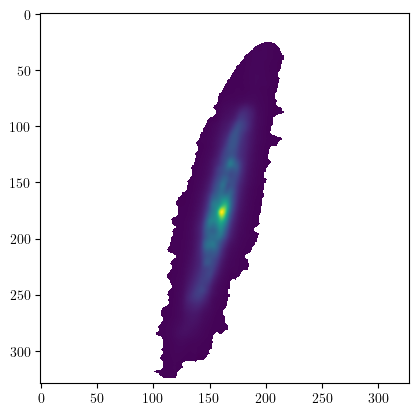

In [36]:
white_image = obs_cube['f_obs'].sum(axis=0)
masked_image = np.ma.masked_array(white_image, mask=(mask == 0))
plt.imshow(masked_image)

Look how pretty! And now it is easy to calculate the total flux.

In [30]:
total_flux = np.sum(masked_image.ravel())

We can use the `luminosity_distance` function in the `utils` module to get the distance in cm based on redshift.

In [33]:
distance = luminosity_distance(z=0.04317, in_cm=True)

And here is your luminosity:

In [35]:
luminosity = total_flux * 4 * np.pi * distance ** 2
print(luminosity)

4.0535578106491294e+43
